## Implementation using High Level API


### 1. Generate Dataset

In [1]:
import torch
import numpy as np
from torch.utils import data
from d2l import torch as d2l

# Original Weights and Biases
true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = d2l.synthetic_data(true_w, true_b, 1000)

### 2. Read Dataset
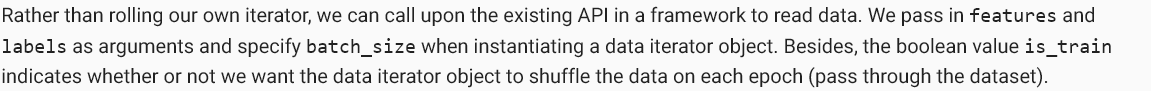

In [2]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

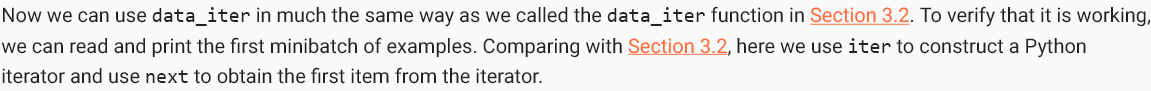

In [3]:
next(iter(data_iter))

[tensor([[-0.0081,  0.6546],
         [ 1.0817, -0.6491],
         [-0.4897, -0.0916],
         [ 0.1161,  0.3851],
         [ 1.2364,  1.1652],
         [ 0.1250,  2.2206],
         [ 0.3949, -1.5305],
         [-0.4153,  0.5660],
         [ 0.4590, -0.0124],
         [-0.5842, -0.2068]]),
 tensor([[ 1.9699],
         [ 8.5687],
         [ 3.5352],
         [ 3.1350],
         [ 2.7179],
         [-3.0795],
         [10.1772],
         [ 1.4640],
         [ 5.1543],
         [ 3.7517]])]

### 3. Define the Model

In [4]:
from torch import nn

model = nn.Sequential(nn.Linear(2, 1)) # net

### 4. Initializing Model Parameters
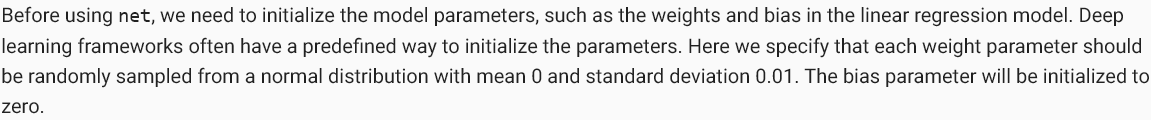

In [5]:
model[0].weight.data.normal_(0, 0.01)
model[0].bias.data.fill_(0)

tensor([0.])

### 5. Loss Function
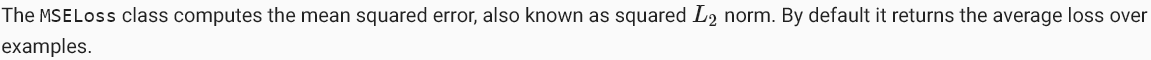

In [6]:
loss = nn.MSELoss()

### 6. Optimization Algorithm
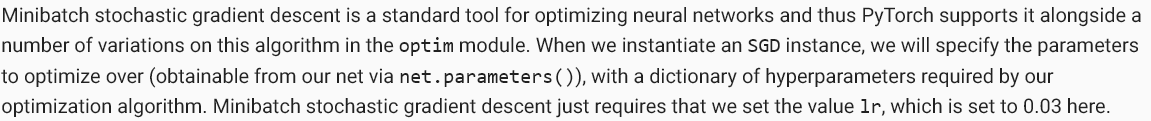

In [7]:
trainer = torch.optim.SGD(model.parameters(), lr=0.03)

### 7. Training
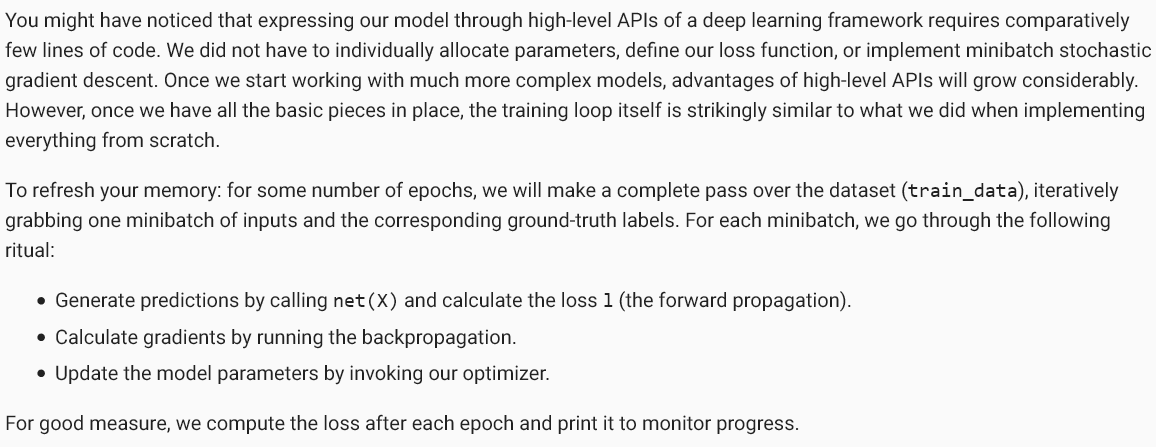

In [8]:
epochs = 10
for epoch in range(epochs):
    for X, y in data_iter:
        l = loss(model(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    
    l = loss(model(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000228
epoch 2, loss 0.000094
epoch 3, loss 0.000094
epoch 4, loss 0.000094
epoch 5, loss 0.000094
epoch 6, loss 0.000094
epoch 7, loss 0.000094
epoch 8, loss 0.000094
epoch 9, loss 0.000094
epoch 10, loss 0.000094


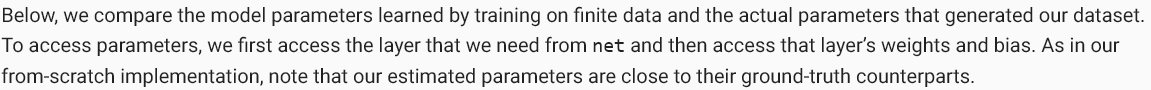

In [10]:
w = model[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = model[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([0.0003, 0.0004])
error in estimating b: tensor([0.0003])
